## **This code will convert a 3D dataset ModelNet to Point Cloud.**
## Install Required **Libraries**

In [ ]:
!pip install open3d tqdm
#Open3D is specifically designed to handle: 3D data such as Point clouds, Voxel grids, RGB-D images
#tqdm is a Python library for showing progress bars in loops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.1
    Unin

Download and Extract **ModelNet10**

In [ ]:
import os
import urllib.request #Download data or files from the internet directly into your Python scripts or notebooks
import zipfile

url = "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip"
zip_path = "ModelNet10.zip"
extract_dir = "ModelNet10"

# Download the zip if not already downloaded
if not os.path.exists(zip_path):
    print("Downloading ModelNet10...")
    urllib.request.urlretrieve(url, zip_path)

# Extract the dataset
if not os.path.exists(extract_dir):
    print("Extracting ModelNet10...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall()

Extracting ModelNet10...


Read .off Mesh File Using Open3D

In [ ]:
import open3d as o3d

def read_off(file_path):
    with open(file_path, 'r') as f:
        if f.readline().strip() != 'OFF':
            raise ValueError("Not a valid OFF header")
        n_verts, n_faces, _ = map(int, f.readline().strip().split())
        verts = [list(map(float, f.readline().strip().split())) for _ in range(n_verts)]
        faces = [list(map(int, f.readline().strip().split()[1:])) for _ in range(n_faces)]

    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(verts)
    mesh.triangles = o3d.utility.Vector3iVector(faces)
    return mesh


Sample the Mesh as Point Cloud

In [ ]:
# Specify the category and sample file
category = "chair"
sample_file = os.path.join("ModelNet10", category, "train", "chair_0001.off")

# Load the mesh
mesh = read_off(sample_file) #Loads mesh from .off file
pcd = mesh.sample_points_uniformly(number_of_points=1024) #Samples 1024 points uniformly across the surface of the mesh to generate a point cloud.



Representation of Point Cloud

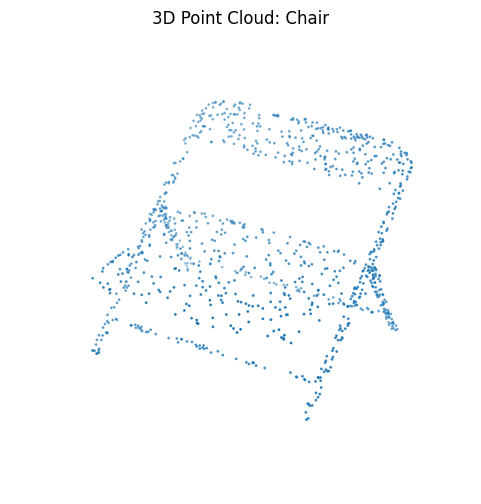

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_point_cloud(pcd):
    points = np.asarray(pcd.points)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1)
    ax.set_title("3D Point Cloud: Chair")
    ax.axis('off')
    plt.show()

plot_point_cloud(pcd)
